# lorapy data processing

In [1]:
%load_ext autoreload
%autoreload 2

import pathlib

import os, sys
from loguru import logger
logger.remove(None)
logger.add(sys.stdout, colorize=True)

import numpy as np

import matplotlib.pyplot as plt 
plt.style.use('dark_background')
%matplotlib inline

In [2]:
import lorapy

## setup 

In [3]:
_BASE_DATA_DIR = pathlib.Path('/Users/trevor/Work/1-projects/lora-processing/data')

BENCHTOP_DATA_DIR = _BASE_DATA_DIR.joinpath('lora-benchtop-recording')
OTA_DATA_DIR = _BASE_DATA_DIR.joinpath('LoRa_Recording_OTA')
OUTDOOR_DATA_DIR = _BASE_DATA_DIR.joinpath('LoRa_Recording_Outdoor')

## utils

In [4]:
import random
rand = lambda mx: random.randint(0, mx)

# load

In [5]:
loader = lorapy.load_dat(OUTDOOR_DATA_DIR, autoload=True)
loader.file_list

2020-04-06 16:16:35.731 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor
2020-04-06 16:16:35.736 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 20 data file(s)


[DatFile(id=0 | name='lora_BW9_SF8_915MHz_1Msps_L42.dat'),
 DatFile(id=1 | name='lora_BW8_SF12_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=2 | name='lora_BW2_SF12_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=3 | name='lora_BW8_SF11_915_25MHz_1Msps_L37.dat'),
 DatFile(id=4 | name='lora_BW8_SF10_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=5 | name='lora_BW9_SF12_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=6 | name='lora_BW2_SF10_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=7 | name='lora_BW9_SF10_915MHz_1Msps_L1.dat'),
 DatFile(id=8 | name='lora_BW1_SF12_915MHz_1Msps_Att70_v3.dat'),
 DatFile(id=9 | name='lora_BW7_SF11_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=10 | name='lora_BW1_SF11_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=11 | name='lora_BW1_SF10_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=12 | name='lora_BW7_SF10_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=13 | name='lora_BW2_SF11_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=14 | name='lora_BW8_SF11_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=15 | name='lora_BW1_SF

In [6]:
loader.select(file_id=18)

DatFile(id=18 | name='lora_BW1_SF11_915MHz_1Msps_Att70_v3.dat')

In [7]:
loader.filter(bw=7)

[DatFile(id=9 | name='lora_BW7_SF11_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=12 | name='lora_BW7_SF10_915MHz_1Msps_Att80_v0.dat'),
 DatFile(id=16 | name='lora_BW7_SF12_915MHz_1Msps_Att80_v0.dat')]

In [8]:
loader.filter(bw=2, sf=11)

[DatFile(id=13 | name='lora_BW2_SF11_915MHz_1Msps_Att80_v0.dat')]

In [9]:
tar_filename = 'lora_BW9_SF10_915MHz_1Msps_L1.dat'

file = [file for file in loader.file_list if file.name == tar_filename][0]
file

DatFile(id=7 | name='lora_BW9_SF10_915MHz_1Msps_L1.dat')

In [10]:
file = loader.filter(bw=9, sf=10)[0]
file

DatFile(id=7 | name='lora_BW9_SF10_915MHz_1Msps_L1.dat')

# process

## convert 

In [11]:
signal = file.to_signal()
signal

2020-04-06 16:16:35.978 | WARNING  | lorapy.utils.filename:extract_value:20 - no matches found [Att(\d{1,})] in filename lora_BW9_SF10_915MHz_1Msps_L1.dat | None
2020-04-06 16:16:35.980 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 2048 and packet length: 61952
2020-04-06 16:16:36.253 | INFO     | lorapy.datafile._base_file:load:61 - loaded 56343771 samples from file


LoraSignal(length=56343771) | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 2048 | packet length: 61952

## stats 

In [12]:
signal.stats

BW: 9 | SF: 10 | Att: 0 | samples per symbol: 2048 | packet length: 61952

## plots

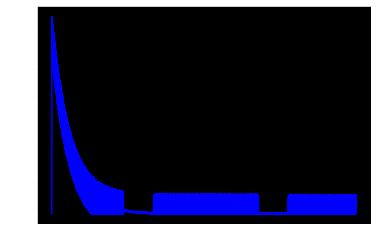

In [13]:
signal.plot(real=True, stop=180_000, color='blue')

# packets

## extract - auto adjust

## extract - manual adjust

In [14]:
signal.extract_packets(method='slide-mean', auto_adj=False, overlap=0.7)

2020-04-06 16:16:36.674 | INFO     | lorapy.signals.signal:_process_signal:106 - selected "slide-mean" processing method
2020-04-06 16:16:36.850 | INFO     | lorapy.signals.processing.sliding_mean:_find_all_mindices:55 - scanning signal for padding locations..
2020-04-06 16:16:36.851 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 0
2020-04-06 16:16:36.869 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 100
2020-04-06 16:16:36.886 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 200
2020-04-06 16:16:36.906 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 300
2020-04-06 16:16:36.928 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 400
2020-04-06 16:16:36.947 | DEBUG    | lorapy.signals.processing.sliding_mean:_find_all_mindices:59 - iteration 500
2020-04-06 16:16:36.966 | DEBUG    | lorapy.signals.proce

In [15]:
signal.adjust_packets(force_check=True, look_ahead=100, threshold=0.5)

2020-04-06 16:16:50.476 | DEBUG    | lorapy.signals.signal:_adjust_endpoints:86 - adjusted endpoints
2020-04-06 16:16:50.477 | DEBUG    | lorapy.packets.utils:slice_all_packets:21 - got max packet length: 61952
2020-04-06 16:16:50.748 | INFO     | lorapy.packets.utils:slice_all_packets:28 - extracted 908 packets from signal
2020-04-06 16:16:50.783 | DEBUG    | lorapy.signals.signal:_slice_and_load:62 - loaded 908 lora packets


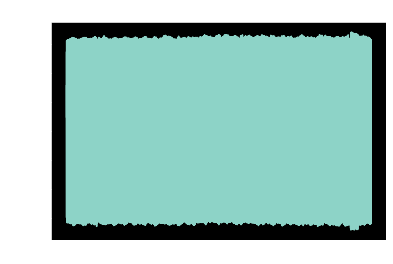

In [19]:
signal.plot_packet()

## inspect

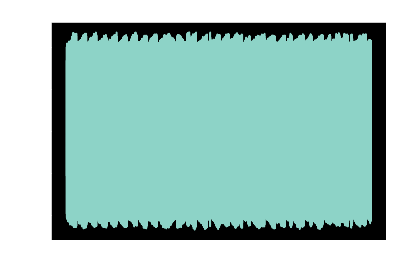

LoraPacket(id=10) || size: 61952 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 2048 | packet length: 61952

In [31]:
packet = signal.random_packet
packet.plot()
display(packet) 

# symbols

In [32]:
packet

LoraPacket(id=10) || size: 61952 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 2048 | packet length: 61952

## extraction

In [33]:
packet.extract_preamble_symbols()

2020-04-06 16:18:42.527 | DEBUG    | lorapy.symbols.utils:slice_preamble_symbols:26 - extracted 8 symbols with length 2048
2020-04-06 16:18:42.528 | DEBUG    | lorapy.packets.packet:_slice_and_load:114 - loaded 8 lora symbols


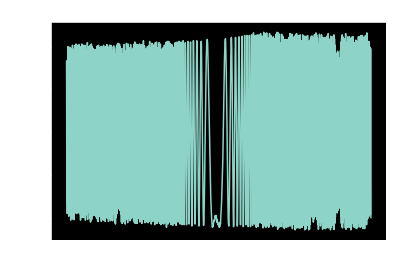

In [34]:
packet.plot_symbol()

## inspection

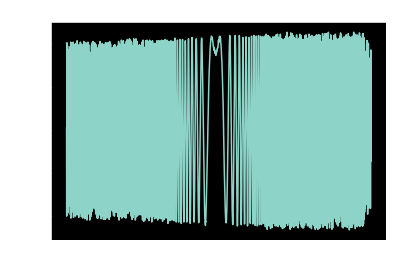

LoraSymbol(id=7) || size: 2048 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 2048 | packet length: 61952

In [35]:
symbol = packet.random_symbol
symbol.plot()
display(symbol) 

## convolution

### setup `.p` reference

In [69]:
ploader = lorapy.load_dotp(OUTDOOR_DATA_DIR, autoload=True)
ploader.file_list

2020-04-06 16:22:53.886 | DEBUG    | lorapy.io._base_loader:_validate_data_path:140 - set datafile directory: /Users/trevor/Work/1-projects/lora-processing/data/LoRa_Recording_Outdoor
2020-04-06 16:22:53.888 | INFO     | lorapy.io._base_loader:_process_data_dir:153 - found 2 data file(s)


[DotPFile(id=0 | name='lora_symbols_BW250000_SF11_L0.p'),
 DotPFile(id=1 | name='lora_symbols_BW9_SF10.p')]

2020-04-06 16:22:57.198 | WARNING  | lorapy.utils.filename:extract_value:20 - no matches found [Att(\d{1,})] in filename lora_symbols_BW9_SF10.p | None
2020-04-06 16:22:57.199 | DEBUG    | lorapy.datafile.encoding:compute_params:15 - computed samples per symbol: 2048 and packet length: 61952
2020-04-06 16:22:57.257 | INFO     | lorapy.datafile._base_file:load:61 - loaded 2785280 samples from file


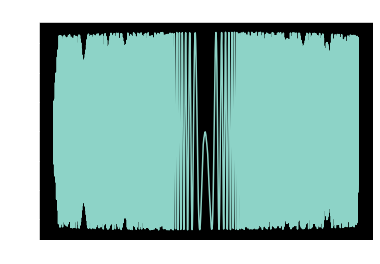

BaselineSymbolSet(num symbols=1360 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 2048 | packet length: 61952)

In [70]:
pfile = ploader.select(1)
baseline = pfile.to_signal()
baseline.plot()
display(baseline)

## convolve

In [52]:
symbol.convolve(baseline.random_symbol)

2020-04-06 16:20:03.908 | DEBUG    | lorapy.symbols.symbol:convolve:37 - convolved symbol with baseline: 5.876898223962126


5.876898223962126

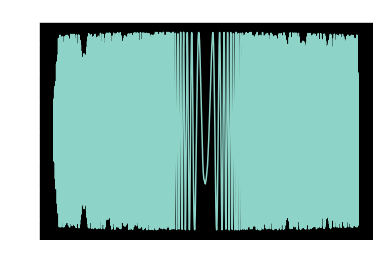

In [55]:
baseline.plot(baseline._lastrand)

## signal all together

2020-04-06 16:21:07.549 | DEBUG    | lorapy.symbols.utils:slice_preamble_symbols:26 - extracted 8 symbols with length 2048
2020-04-06 16:21:07.550 | DEBUG    | lorapy.packets.packet:_slice_and_load:114 - loaded 8 lora symbols


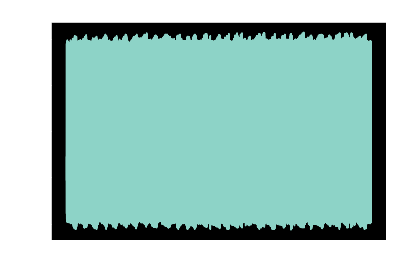

LoraPacket(id=107) || size: 61952 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 2048 | packet length: 61952

In [56]:
packet = signal.random_packet
packet.extract_preamble_symbols()

packet.plot()
display(packet)

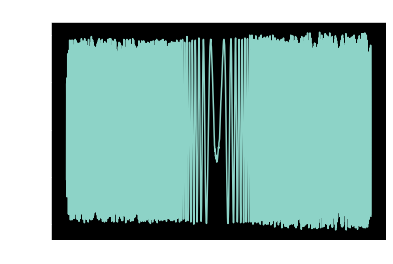

LoraSymbol(id=0) || size: 2048 | BW: 9 | SF: 10 | Att: 0 | samples per symbol: 2048 | packet length: 61952

In [57]:
symbol = packet.random_symbol
symbol.plot()
display(symbol) 

In [65]:
symbol.convolve(baseline[562])

2020-04-06 16:22:02.233 | DEBUG    | lorapy.symbols.symbol:convolve:37 - convolved symbol with baseline: 6.508939075569681


6.508939075569681

In [66]:
symbol.absolute_endpoints

(6683652, 6685700)

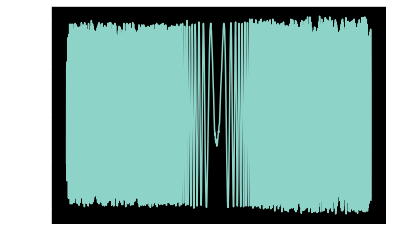

In [67]:
signal.plot(real=False, start=symbol.absolute_endpoints[0], stop=symbol.absolute_endpoints[1])

In [68]:
signal.stats.filename

'lora_BW9_SF10_915MHz_1Msps_L1.dat'

## conv scratch

In [ ]:
baseline = baseline[0:signal.stats.samp_per_sym]

c_out = []

for i in range(symbols.shape[0]):
    sig = symbols[i,:]
    sig_c = np.conj(sig[::-1])
    conv_val = np.abs(np.convolve(baseline,sig_c))/np.linalg.norm(sig)/np.linalg.norm(sig)

    c_out.append(np.max(conv_val))

fig = plt.figure(figsize=(15,5))
plt.plot(c_out)